# Churn Analysis
Dans ce dataset il est principalement question de fournir une analyse detaillee des donnees provenant du dataset Loan donnee en cours par l'enseignant. 

Les donnees sont issues d'un dataset de 10000 clients d'une banque. Le but est de predire si un client va quitter la banque ou non.
Il sera question donc, apres avoir importe les donnees, de :
- L'exploratory data analysis (qui comprendra beaucoup de data visualization)
- Data Cleaning
- Feature engineering
- Model training

Churn-Modelling_
Feature_Engineering_
Pickle_and_
hyperParameterTuning

## Exploratory Data Analysis 
(with Data Visualization and Data Cleaning)

### Step 0 : import and read the data

In [5]:
# libraries import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm

In [6]:
# load data
df = pd.read_csv('../datasets/bank/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Step 1 :Data Understanding
 

In [8]:
# dataframe shape
df.shape

(10000, 14)

In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# essayons de voir le nombre de données unique par colonne pour discerner les variables catégorielles
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

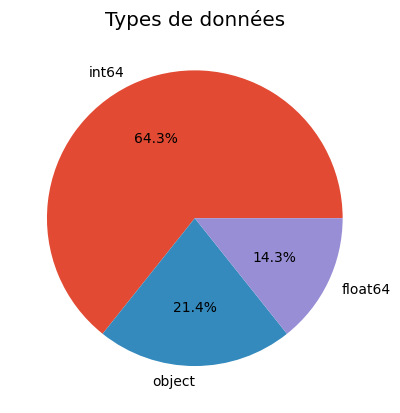

In [12]:
types = df.dtypes.value_counts()

# diagramme en cercle pour mieux visualiser les types de données
plt.pie(types, labels=types.index.map(str), autopct='%1.1f%%')
plt.title('Types de données')
plt.show()

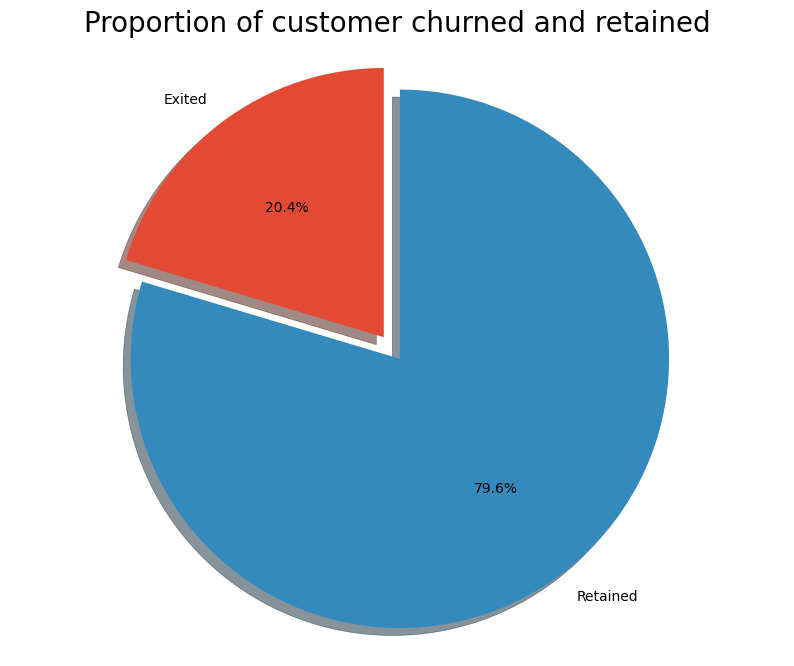

In [13]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

### Step 2 : Data Preparation (and Data Cleaning for more productivity)

In [14]:
# print number of of duplicated rows
print('Number of duplicated rows: {}'.format(df.duplicated().sum()))

Number of duplicated rows: 0


In [15]:
# missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Step 3 : Feature Understanding

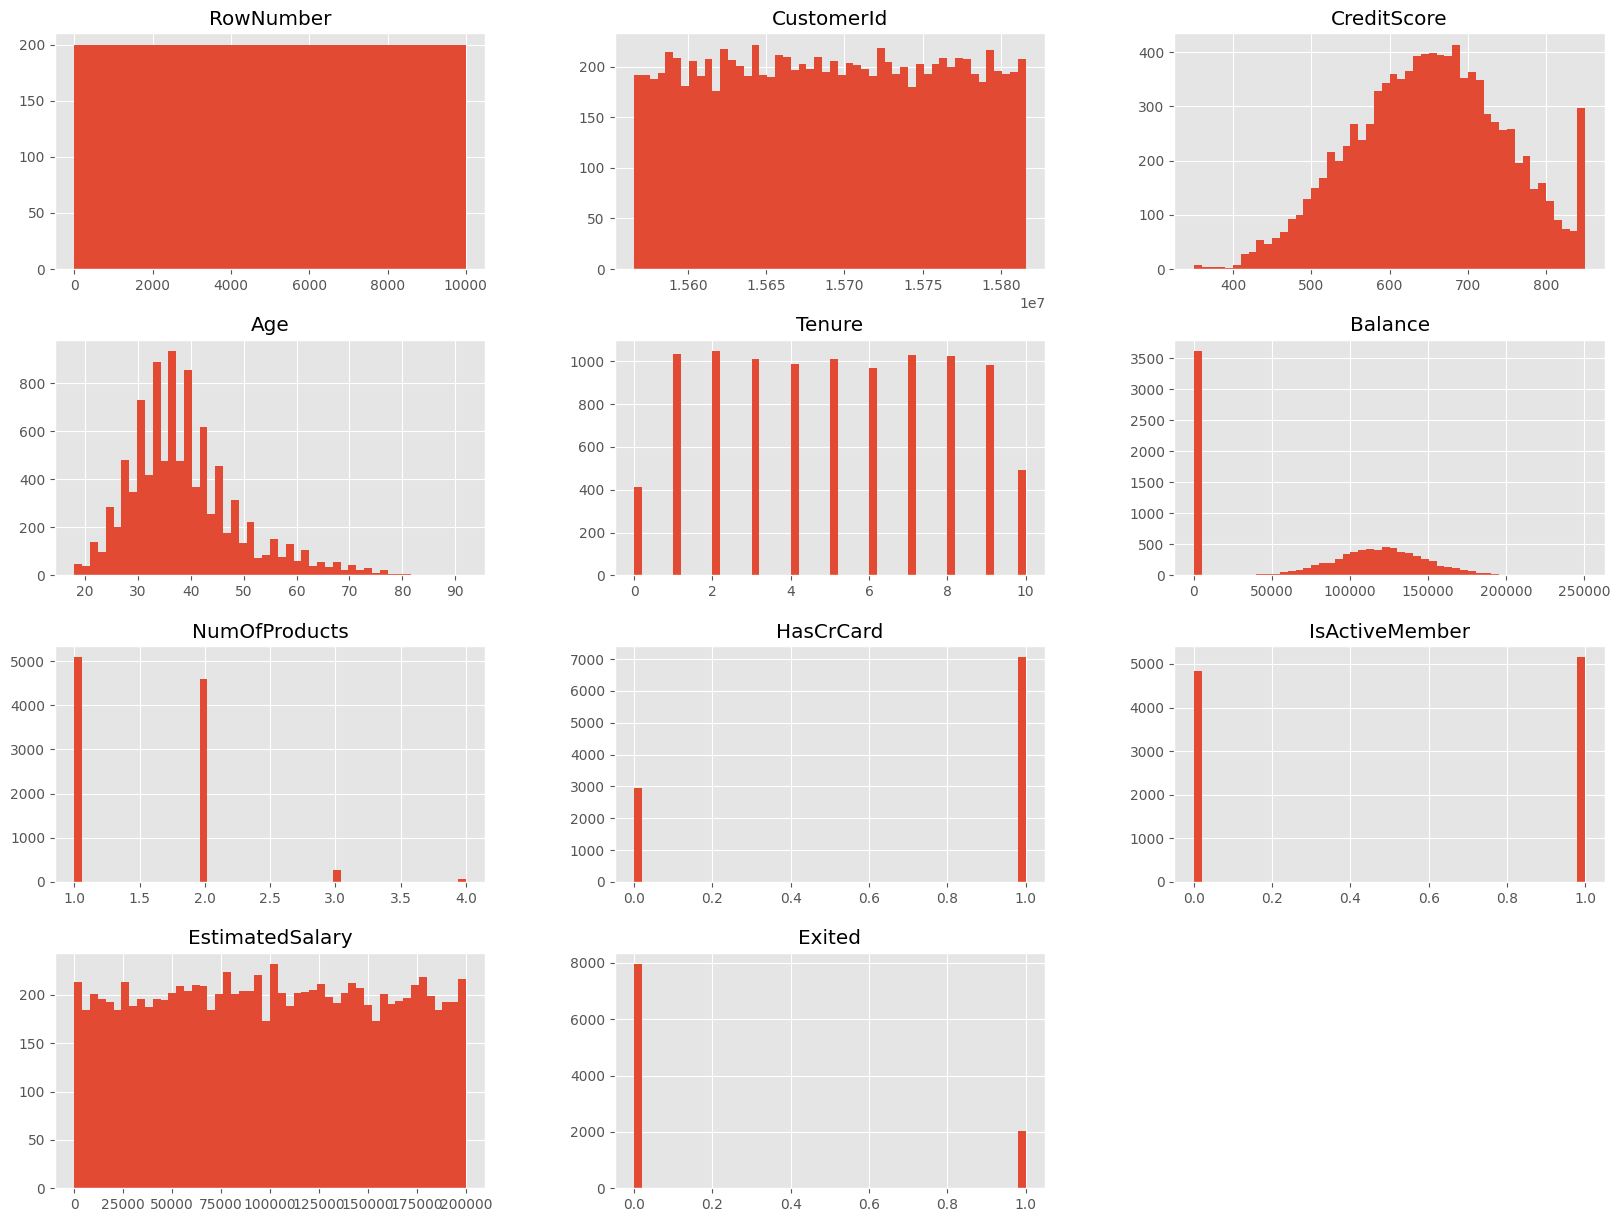

In [16]:
# feature # histogramme de toutes les variables quantitatives
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: xlabel='IsActiveMember', ylabel='count'>

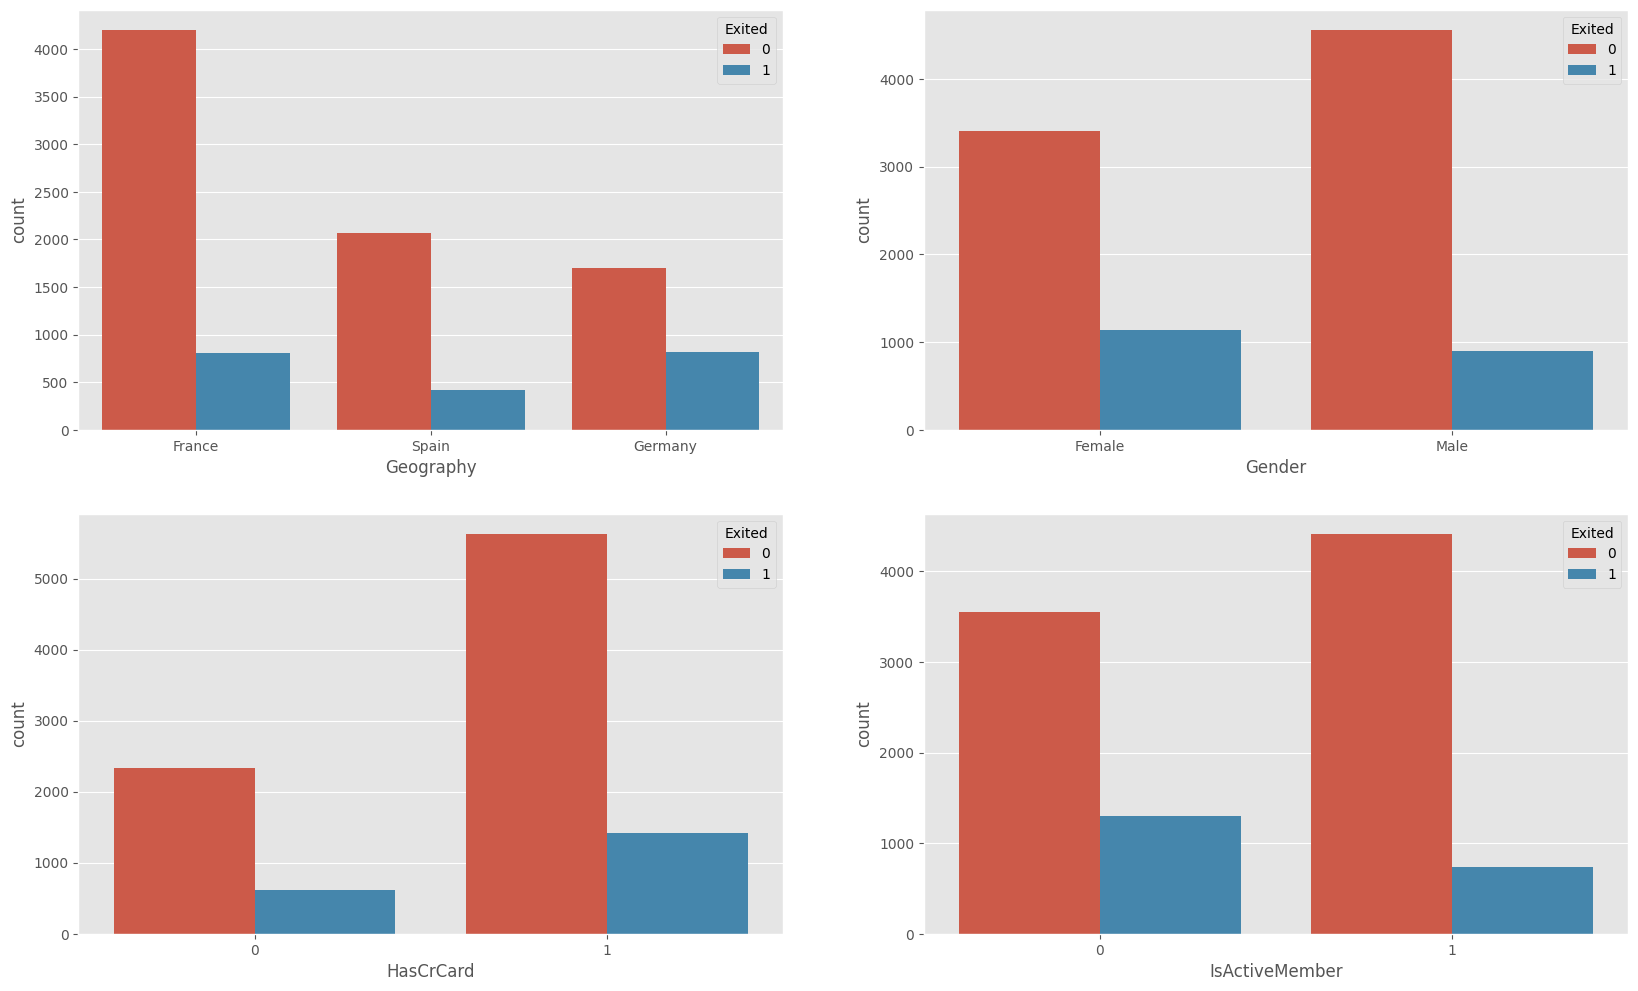

In [17]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<AxesSubplot: xlabel='Exited', ylabel='EstimatedSalary'>

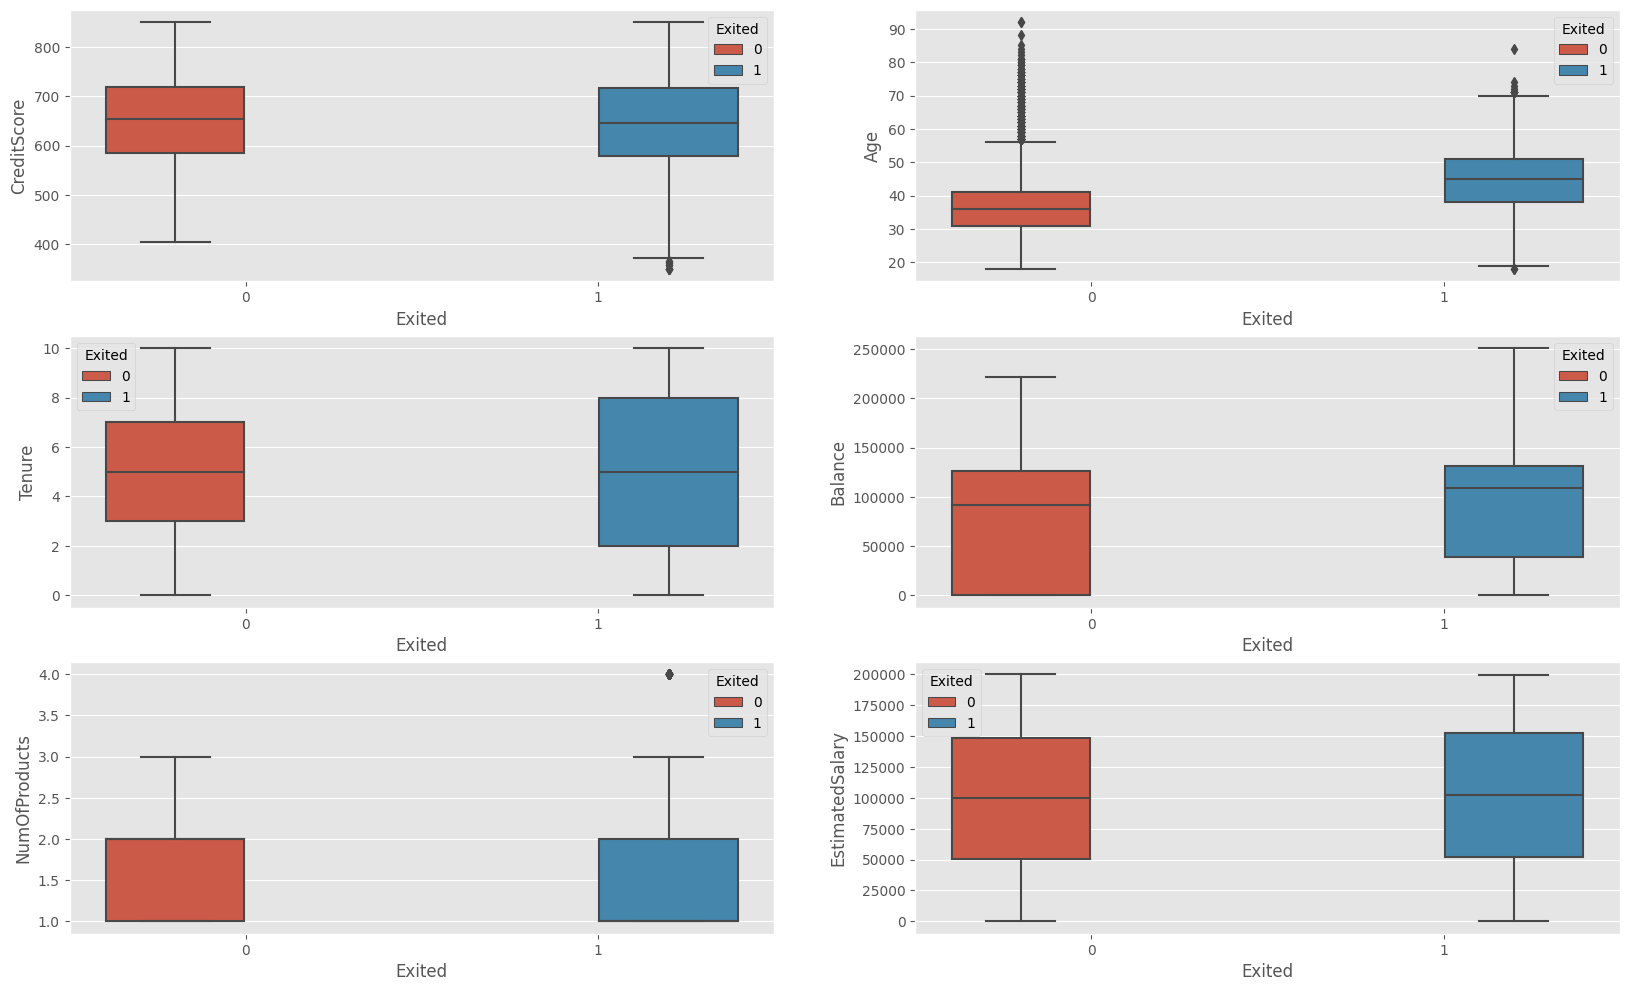

In [18]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [19]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Feature Engineering

In [20]:
# on va supprmer les Colonnes RowNumber, CustomerId et Surname car elles ne sont pas utiles pour notre modèle 
# de plus elles ne représentent pas des variables explicatives
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [21]:
print(df.shape)
df.head()

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


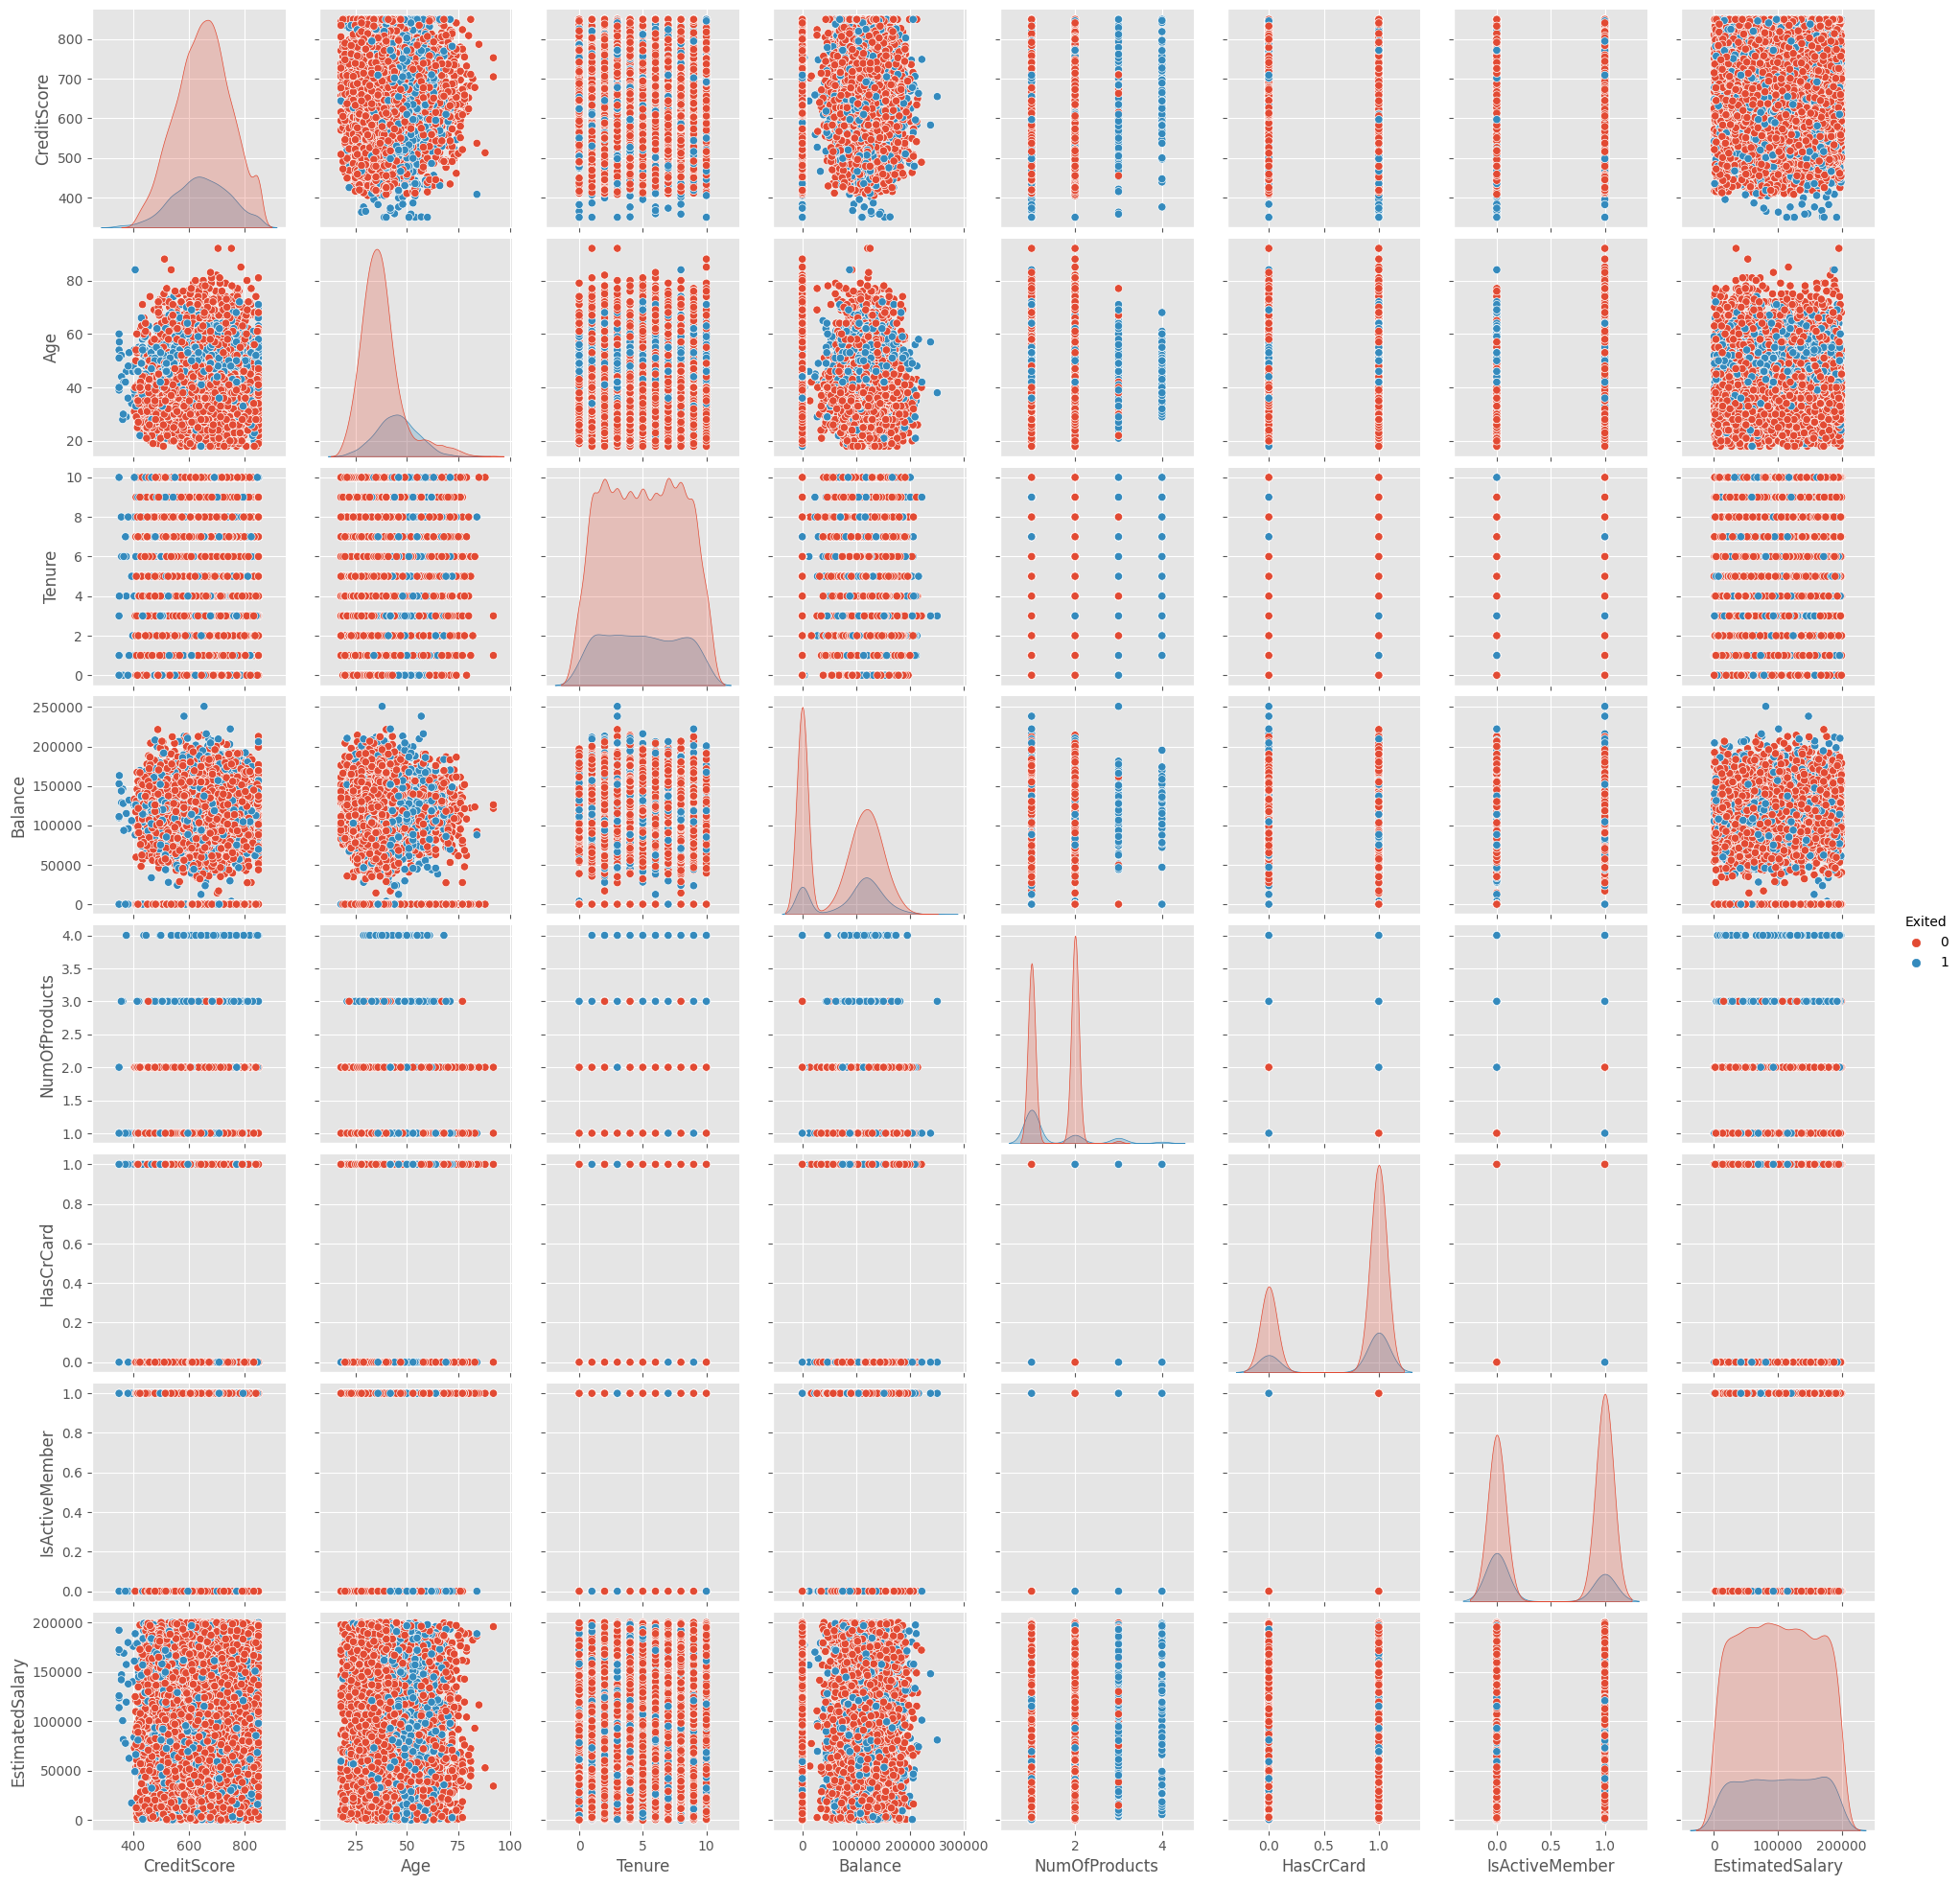

In [22]:
# scatter plot matrix with sns
sns.pairplot(df, hue='Exited', diag_kind='kde', height=2.5)
plt.show()

- encoding categoricals vars

In [23]:
# Encodons les varaibles de types categorielles 
# on va utiliser le label encoder de sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

- on va rechercher des nouvelles correlations entre les variables

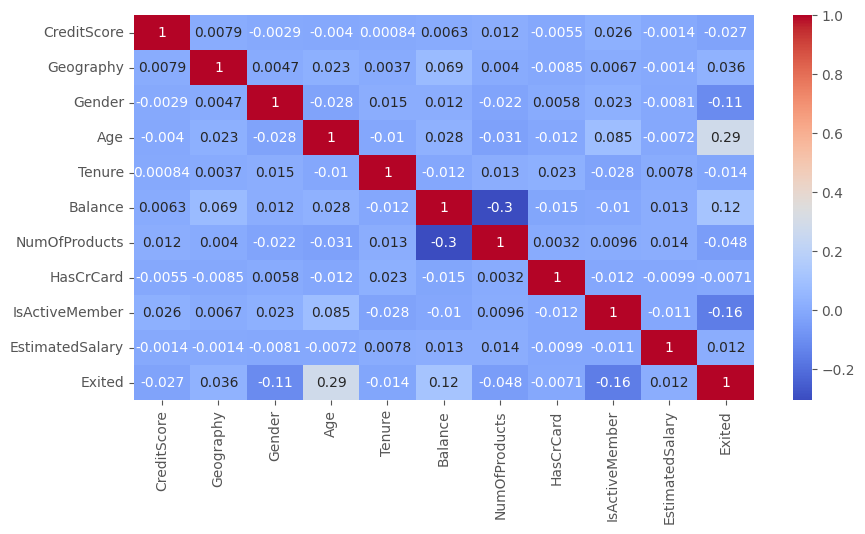

In [24]:
# recherche de nouvelles correlations
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

On va donc rester sur les features actuels de notre Dataframe Actuel

In [25]:
# importing train test split
from sklearn.model_selection import train_test_split

# split data into train and test
X = df.drop('Exited', axis=1)

y = df['Exited']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data Modeling

In [26]:
# pourcentage des "Exited"
df.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

on remarque un desequilibre entre les classes, on va donc utiliser une technique de resampling a savoir l'oversampling

In [27]:
# Instantiate the resampling algorithms
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# resampling the data with SMOTE
X_smote, y_smote = smote.fit_resample(X, y)

In [28]:
# Before resampling
print('Before resampling: \n{}'.format(y.value_counts(normalize=True)))

# After resampling
print('\nAfter resampling: \n{}'.format(y_smote.value_counts(normalize=True)))

Before resampling: 
0    0.7963
1    0.2037
Name: Exited, dtype: float64

After resampling: 
1    0.5
0    0.5
Name: Exited, dtype: float64


### Classifiers Selection

In [29]:
# classifier selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# import XGBoost classifier
from xgboost import XGBClassifier

classifiers = [
    XGBClassifier(random_state = 42),
    LogisticRegression(max_iter=1000, random_state = 42),
    DecisionTreeClassifier(random_state = 42),
    RandomForestClassifier(random_state = 42, n_estimators = 100),
    KNeighborsClassifier() 
]

### Metrics Selection
importons quelques metrics pour evaluer les performances de nos classificateurs.

In [30]:
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

- resultat de la classification avec les differents classifieurs sans sur-echantillonnage

In [31]:
results = []

for classifier in classifiers:
    # Train and predict using ADASYN resampled data
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Add results to list
    results.append({
        'Classifier': classifier.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

# Convert results list to pandas DataFrame
df_results = pd.DataFrame(results)

# Display results DataFrame
print(df_results)

               Classifier  Accuracy  Precision    Recall        F1
0           XGBClassifier  0.866667   0.734694  0.493151  0.590164
1      LogisticRegression  0.800667   0.436364  0.082192  0.138329
2  DecisionTreeClassifier  0.794000   0.473016  0.510274  0.490939
3  RandomForestClassifier  0.868333   0.775510  0.455479  0.573894
4    KNeighborsClassifier  0.770667   0.254717  0.092466  0.135678


- resulant de la classification avec les differents classifieurs avec sur-echantillonnage

In [32]:
results_smote = []

for classifier in classifiers:
    # Train and predict using Smote resampled data
    classifier.fit(X_smote, y_smote)
    y_pred_smote = classifier.predict(X_test)
    
    # Compute evaluation metrics
    accuracy_smote = accuracy_score(y_test, y_pred_smote)
    precision_smote = precision_score(y_test, y_pred_smote)
    recall_smote = recall_score(y_test, y_pred_smote)
    f1_smote = f1_score(y_test, y_pred_smote)
    
    # Add results to list
    results_smote.append({
        'Classifier': classifier.__class__.__name__,
        'Accuracy': accuracy_smote,
        'Precision': precision_smote,
        'Recall': recall_smote,
        'F1': f1_smote
    })

# Convert results list to pandas DataFrame
df_results_smote = pd.DataFrame(results_smote)

# Display results DataFrame
print(df_results_smote)

               Classifier  Accuracy  Precision    Recall        F1
0           XGBClassifier  0.921667   0.759287  0.875000  0.813047
1      LogisticRegression  0.646000   0.298482  0.606164  0.400000
2  DecisionTreeClassifier  1.000000   1.000000  1.000000  1.000000
3  RandomForestClassifier  1.000000   1.000000  1.000000  1.000000
4    KNeighborsClassifier  0.744333   0.420227  0.825342  0.556904


## Hyperparameter Tuning (GridSearchCV) & Learning Score

In [33]:
# Create the parameter grid
import numpy as np

KN_param_grid = {'n_neighbors': np.arange(1, 20),
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan']}
LR_param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
                    'C': [0.01, 0.1, 1, 10, 100 ]}

DTC_param_grid = {'criterion': ['gini', 'entropy'],
                    'max_depth': [3, 5, 7],
                    'min_samples_split': [2,4,6,8],
                    }

RF_param_grid = {'n_estimators': [100 , 300 , 500],
                    'criterion': ['gini', 'entropy'],
                    'min_samples_split': [2, 5, 10, 20, 50],
                    'min_samples_leaf': [1, 2, 5, 10, 20]
                }

XGB_param_grid = {  'learning_rate': [0.1, 0.01],
                    'max_depth': [3, 5, 7],
                    'n_estimators': [100, 200, 500],
                    'gamma': [0, 0.1, 0.2],
                }

In [35]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create the grid search objects
for classifier in classifiers:
    if classifier.__class__.__name__ == 'KNeighborsClassifier':
        grid_search = GridSearchCV(classifier, KN_param_grid, cv=5)
        print("Working with KNN 🙌")
    elif classifier.__class__.__name__ == 'LogisticRegression':
        grid_search = GridSearchCV(classifier, LR_param_grid, cv=5)
        print("Working with LR 🙌")
    elif classifier.__class__.__name__ == 'DecisionTreeClassifier':
        grid_search = GridSearchCV(classifier, DTC_param_grid, cv=5)
        print("Working with DTC 🙌")
    elif classifier.__class__.__name__ == 'RandomForestClassifier':
        grid_search = GridSearchCV(classifier, RF_param_grid, cv=5)
        print("Working with RFC 🙌")
    elif classifier.__class__.__name__ == 'XGBClassifier':
        grid_search = GridSearchCV(classifier, XGB_param_grid, cv=5)
        print("Working with XGB 🙌")
    else:
        print('No classifier found')
    
    # timing training
    import time
    start = time.time()
    # Fit the grid search
    grid_search.fit(X_smote, y_smote)
    stop = time.time()

    print("Working time: {:.2f} seconds".format(stop - start))
    
    print("Done with", classifier.__class__.__name__, "✅")

    # Print the best parameters and best score
    print("Best parameters: {}".format(grid_search.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Working with XGB 🙌
Working time: 673.75 seconds
Done with XGBClassifier ✅
Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}
Best cross-validation score: 0.87
Working with LR 🙌


c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\linear_model\_logistic.p

Working time: 6.66 seconds
Done with LogisticRegression ✅
Best parameters: {'C': 0.01, 'penalty': 'l2'}
Best cross-validation score: 0.68
Working with DTC 🙌
Working time: 6.10 seconds
Done with DecisionTreeClassifier ✅
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 8}
Best cross-validation score: 0.81
Working with RFC 🙌
Working time: 4371.58 seconds
Done with RandomForestClassifier ✅
Best parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best cross-validation score: 0.86
Working with KNN 🙌
Working time: 22.69 seconds
Done with KNeighborsClassifier ✅
Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.73


### Testing the best model on the test set

In [82]:
# testing the best model (XGB) on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# Train and predict using smote resampled data
xgb = XGBClassifier(random_state = 42, learning_rate = 0.1, max_depth = 7, n_estimators = 500, gamma = 0.1)

xgb.fit(X_smote, y_smote)
y_pred = xgb.predict(X_test)

lst = []
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

lst.append({
    'Classifier': xgb.__class__.__name__,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
})

print(lst)



[{'Classifier': 'XGBClassifier', 'Accuracy': 0.9883333333333333, 'Precision': 0.9522240527182867, 'Recall': 0.9897260273972602, 'F1': 0.9706129303106633}]


In [39]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [41]:
# renew the dataframe
new_df = pd.read_csv('../datasets/bank/churn.csv')

In [ ]:
new_df = new_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)


In [46]:
# split new_df 
X = new_df.drop('Exited', axis = 1)
y = new_df['Exited']


Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [94]:
# pipeline d'evaluation de nouvelles données car on a encodé certaines variables Geography et Gender en utilisant label encoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import FunctionTransformer

def encode_Categorical_features(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df

def predict_new_data(Xnew):
    # si c'est un dictionnaire on le transforme en dataframe
    if type(Xnew) == dict:
        Xnew = pd.DataFrame(Xnew, index = [0])
    Xnew = encode_Categorical_features(Xnew)
    return xgb.predict(Xnew)

ynew_pred = predict_new_data(Xnew_test)

accuracy = accuracy_score(ynew_test, ynew_pred)
precision = precision_score(ynew_test, ynew_pred)
recall = recall_score(ynew_test, ynew_pred)
f1 = f1_score(ynew_test, ynew_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))
print("Confusion matrix: \n{}".format(confusion_matrix(ynew_test, ynew_pred)))


Accuracy: 0.99
Precision: 0.95
Recall: 0.99
F1: 0.97
Confusion matrix: 
[[2387   29]
 [   6  578]]


## Resultats et Tests

On remarque que le score est tres proche de celui de l'entrainement, ce qui est un bon signe.
Donc L'oversampling a joue en notre faveur.

In [45]:
new_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


predisons un nouvelle entree

In [95]:
# predire une nouvelle donnée
new_data = {'CreditScore': 600, 'Geography':'Spain', 'Gender':'Female', 'Age': 40, 'Tenure': 3, 'Balance': 60000, 'NumOfProducts': 2, 'HasCrCard': 1, 'IsActiveMember': 1, 'EstimatedSalary': 50000}

print(predict_new_data(new_data))

[1]


### Model Saving


In [96]:
# sauvegarder le modèle
import pickle

# nom du fichier .pkl
filename = '../models/churn_xgb_model.pkl'

# sauvegarder le modèle dans le fichier
with open(filename, 'wb') as file:
    pickle.dump(classifier, file)